#  Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Insurance DataSet

In [2]:
df=pd.read_csv('Downloads/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking for null values

In [3]:
df.isnull().sum() # found no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Label Encoding

In [4]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

df['sex']=label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
df['sex'].unique()
df['smoker'].unique()
df['region'].unique()

array([3, 2, 1, 0])

In [5]:
# Label encoded DataFrame
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Feature Scaling 

In [6]:
from sklearn import preprocessing 

features=['age','sex','bmi','children','region','smoker']

# Separating out the features
x=df.loc[:,features].values

# Separating out the Target 
y=df.loc[:,['charges']].values

min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
min_max_scaler=min_max_scaler.fit_transform(x)

# Standardization

In [7]:
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()

scaled_data=scaler.fit_transform(min_max_scaler)

In [8]:
scaled_data

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.34390459,
         1.97058663],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719,  0.43849455,
        -0.5074631 ],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576,  0.43849455,
        -0.5074631 ],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367,  0.43849455,
        -0.5074631 ],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367,  1.34390459,
        -0.5074631 ],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367, -0.46691549,
         1.97058663]])

# PCA

In [9]:
#instantiate pca
from sklearn.decomposition import PCA

# Creating Dummy PCA object to decide the number of components based on Scree Plot
cpca=PCA(n_components=None)

In [10]:
#fitting and applying dimensionaity reduction
cpca.fit_transform(scaled_data)

array([[ 0.4138055 ,  1.11914688, -1.78482549,  0.68409261,  2.1492386 ,
        -0.3391514 ],
       [-0.12275981,  0.8221422 , -1.00416857,  0.83286115, -1.13903812,
         0.53347163],
       [-0.62442365,  0.6374776 ,  0.55788538,  1.54161695, -1.05905363,
         0.32614469],
       ...,
       [-0.01196397, -0.53097399, -1.89164153,  0.52494884,  0.19458612,
         1.19694489],
       [ 0.65020071, -0.58750209, -1.93950587,  1.06112088,  0.40162833,
        -0.64070276],
       [ 0.10392973,  0.09896763,  0.44724209, -1.7904566 ,  2.18741871,
        -0.4613501 ]])

# Scree Plot Visualization

In [11]:
# Percentage of variance explained by each of the selected components
cpca.explained_variance_ratio_

array([0.20060309, 0.1813664 , 0.16992314, 0.16087702, 0.15399424,
       0.1332361 ])

Text(0.5, 1.0, 'Scree Plot of Variance explained ratio for each principal component')

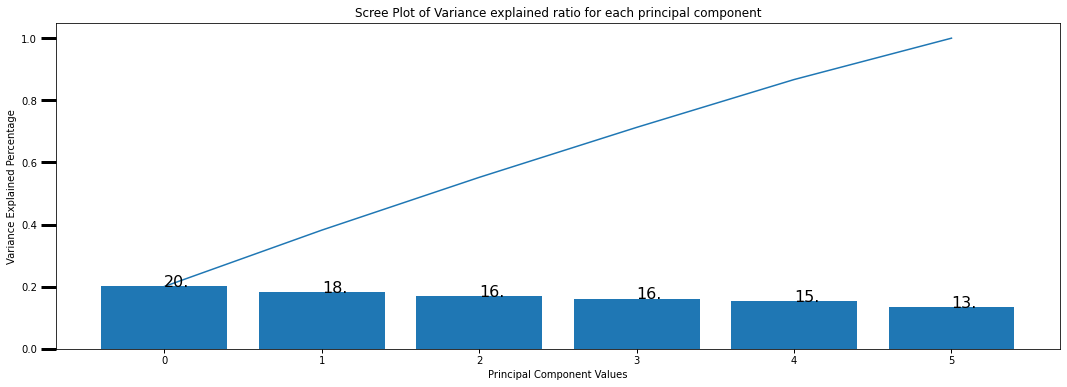

In [12]:
num_components=len(cpca.explained_variance_ratio_)

# indexing
index=np.arange(num_components)

# values of respective indices
values=cpca.explained_variance_ratio_

# define the graph
plt.figure(figsize=(18,6))
ax=plt.subplot(111)

# Cummulative sum of variances
cummulative=np.cumsum(values)

ax.bar(index,values)
ax.plot(index,cummulative)

# add annotation to our graph
for val in range(num_components):
    ax.annotate(r"%s"%((str(values[val]*100)[:3])),(index[val],values[val]),fontsize=16)
#setting tick parameters

ax.xaxis.set_tick_params(width=1)
ax.yaxis.set_tick_params(width=3,length=15)

#labelling x and y axis

ax.set_xlabel('Principal Component Values')
ax.set_ylabel('Variance Explained Percentage')
plt.title('Scree Plot of Variance explained ratio for each principal component')

In [13]:
# From the above plot we can say Majority of variance can be seen in first 3 components
# no. of components for PCA should be 3

In [14]:
# Creating PCA object with 5 components
pca=PCA(n_components=5)

new_df=pca.fit_transform(scaled_data)

In [15]:
# Eigen Vectors and Eigen Values

print('Eigen Vectors are',pca.components_)
print('\n')
print('Eigen Values are',pca.explained_variance_)

Eigen Vectors are [[-3.96111907e-01 -1.52952233e-01 -6.89751591e-01 -1.84825089e-01
  -5.56136153e-01 -2.22705828e-02]
 [-3.31382274e-01  6.63744948e-01  1.99346420e-04  3.09145746e-02
   1.61448339e-02  6.69635742e-01]
 [ 4.84880595e-01  1.08676800e-01 -1.39563164e-01  7.22533876e-01
  -4.46672235e-01  1.09685902e-01]
 [-5.62929527e-01 -1.57014717e-01 -1.51944787e-01  6.56974251e-01
   4.20789205e-01 -1.63373154e-01]
 [ 9.57719586e-02 -6.77767805e-01 -3.63916124e-02  4.33630385e-03
   1.33219435e-01  7.15798829e-01]]


Eigen Values are [1.20451879 1.08901232 1.02030138 0.9659841  0.92465654]


In [16]:
# These are our principle component vaues
new_df

array([[ 0.4138055 ,  1.11914688, -1.78482549,  0.68409261,  2.1492386 ],
       [-0.12275981,  0.8221422 , -1.00416857,  0.83286115, -1.13903812],
       [-0.62442365,  0.6374776 ,  0.55788538,  1.54161695, -1.05905363],
       ...,
       [-0.01196397, -0.53097399, -1.89164153,  0.52494884,  0.19458612],
       [ 0.65020071, -0.58750209, -1.93950587,  1.06112088,  0.40162833],
       [ 0.10392973,  0.09896763,  0.44724209, -1.7904566 ,  2.18741871]])

In [17]:
# Before PCA there are 6 components
scaled_data.shape

(1338, 6)

In [18]:
# After PCA there are 5 components
new_df.shape

(1338, 5)

In [19]:
# Creating Final Data Frame
f_df=pd.DataFrame(data=new_df,columns=['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4'])
final_df=pd.concat([f_df,df[['charges']]],axis=1)
final_df

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,charges
0,0.413805,1.119147,-1.784825,0.684093,2.149239,16884.92400
1,-0.122760,0.822142,-1.004169,0.832861,-1.139038,1725.55230
2,-0.624424,0.637478,0.557885,1.541617,-1.059054,4449.46200
3,1.363097,0.427586,-0.428150,-0.418729,-1.094912,21984.47061
4,0.692600,0.451383,-0.604048,-0.532564,-1.138595,3866.85520
...,...,...,...,...,...,...
1333,-0.511678,0.103708,1.768313,0.329442,-1.017533,10600.54830
1334,1.552928,-0.560371,-0.969928,-0.114141,-0.017219,2205.98080
1335,-0.011964,-0.530974,-1.891642,0.524949,0.194586,1629.83350
1336,0.650201,-0.587502,-1.939506,1.061121,0.401628,2007.94500


# Train Test Splitting

In [20]:
from sklearn.model_selection import train_test_split

x=final_df.drop(columns='charges',axis=1)

y=final_df['charges']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state = 2)

# Building Random Forest Regressor

In [21]:
#instantiating random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 2)

# Training the model
rf.fit(X_train,Y_train)  

RandomForestRegressor(random_state=2)

In [22]:
# Predicting using our Data
Y_pred=rf.predict(X_test)

In [23]:
# sample prediction of single data point
rf.predict([[0.413805,1.119147,-1.784825,0.684093,2.149239]])

array([17114.4735526])

# Model Evaluation 

In [24]:
# importing regression metrics

import sklearn.metrics as metrics

# Finding mean_squared_error
mse=metrics.mean_squared_error(Y_test,Y_pred)
print('mean squared error is',mse)

# Finding Root Mean Squared Error
rmse=np.sqrt(mse)
print('Root Mean Squared Error is',rmse)

# Finding R2 Score
r2=metrics.r2_score(Y_test,Y_pred)
print('R2 Score is',r2)

mean squared error is 27508893.457358185
Root Mean Squared Error is 5244.892130192783
R2 Score is 0.8126085148543778


# Random Forest Visualization

In [25]:
x.describe() 
# To find minimum value and maximum value from x  

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-2.634498e-17,7.680495e-17,1.468681e-17,-4.713054e-17,-1.659526e-18
std,1.097506e+00,1.043558e+00,1.010100e+00,9.828449e-01,9.615906e-01
min,-2.952106e+00,-1.645490e+00,-2.345104e+00,-2.598977e+00,-1.415931e+00
25%,-7.641456e-01,-8.807483e-01,-7.362890e-01,-6.481126e-01,-9.792484e-01
50%,2.275687e-02,1.730268e-02,-4.492334e-02,7.792339e-03,2.170103e-01
75%,7.569522e-01,6.525030e-01,6.918888e-01,6.526881e-01,5.151341e-01
max,3.052880e+00,2.507119e+00,3.091652e+00,3.797430e+00,2.442997e+00


In [26]:
# From the above data minimum value is -2.952106e+00 and maximum value is 3.797430e+00

In [27]:
# Creating X grid for a continuous plot
x_grid=np.arange(-2.952106e+00,3.797430e+00,0.01)

In [28]:
# Creating a dataframe which will be used for predicting values later,then we will plot fitting line
X_grid=pd.DataFrame(x_grid)
X_grid['1']=x_grid
X_grid['2']=x_grid
X_grid['3']=x_grid
X_grid['4']=x_grid

In [29]:
X_grid

,0,1,2,3,4
0,-2.952106,-2.952106,-2.952106,-2.952106,-2.952106
1,-2.942106,-2.942106,-2.942106,-2.942106,-2.942106
2,-2.932106,-2.932106,-2.932106,-2.932106,-2.932106
3,-2.922106,-2.922106,-2.922106,-2.922106,-2.922106
4,-2.912106,-2.912106,-2.912106,-2.912106,-2.912106
...,...,...,...,...,...
670,3.747894,3.747894,3.747894,3.747894,3.747894
671,3.757894,3.757894,3.757894,3.757894,3.757894
672,3.767894,3.767894,3.767894,3.767894,3.767894
673,3.777894,3.777894,3.777894,3.777894,3.777894


In [30]:
# Values for fitting line of Random Forest Regressor
Y_grid=rf.predict(X_grid)

# Fitting line against Principal Component 0

<function matplotlib.pyplot.show(close=None, block=None)>

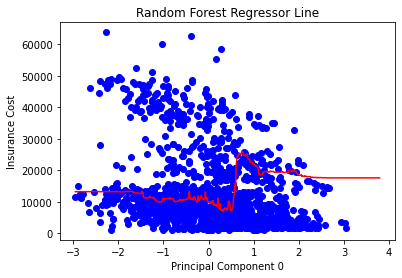

In [31]:
plt.scatter(x['Principal Component 0'],y,color='blue')
plt.plot(X_grid[0],Y_grid,color='red')
plt.xlabel('Principal Component 0')
plt.ylabel('Insurance Cost')
plt.title('Random Forest Regressor Line')
plt.show

# Fitting line against Principal Component 1

<function matplotlib.pyplot.show(close=None, block=None)>

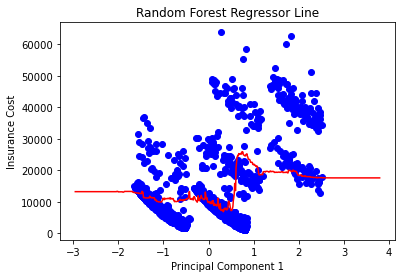

In [32]:
plt.scatter(x['Principal Component 1'],y,color='blue')
plt.plot(X_grid['1'],Y_grid,color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Insurance Cost')
plt.title('Random Forest Regressor Line')
plt.show

# Fitting line against Principal Component 2

<function matplotlib.pyplot.show(close=None, block=None)>

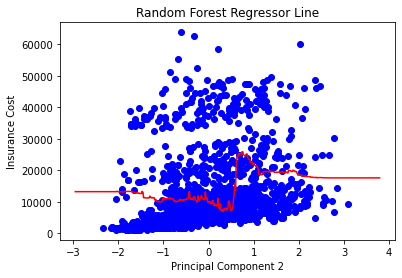

In [33]:
plt.scatter(x['Principal Component 2'],y,color='blue')
plt.plot(X_grid['1'],Y_grid,color='red')
plt.xlabel('Principal Component 2')
plt.ylabel('Insurance Cost')
plt.title('Random Forest Regressor Line')
plt.show

# Fitting line against Principal Component 3

<function matplotlib.pyplot.show(close=None, block=None)>

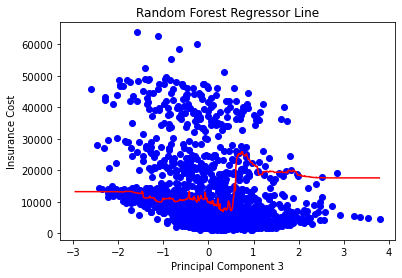

In [34]:
plt.scatter(x['Principal Component 3'],y,color='blue')
plt.plot(X_grid['1'],Y_grid,color='red')
plt.xlabel('Principal Component 3')
plt.ylabel('Insurance Cost')
plt.title('Random Forest Regressor Line')
plt.show

# Fitting line against Principal Component 4

<function matplotlib.pyplot.show(close=None, block=None)>

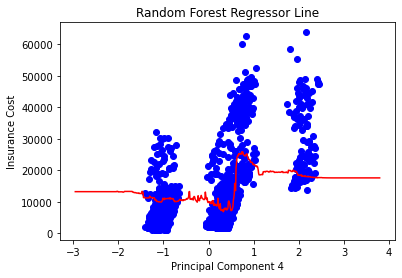

In [35]:
plt.scatter(x['Principal Component 4'],y,color='blue')
plt.plot(X_grid['1'],Y_grid,color='red')
plt.xlabel('Principal Component 4')
plt.ylabel('Insurance Cost')
plt.title('Random Forest Regressor Line')
plt.show

# Actual vs Predicted values

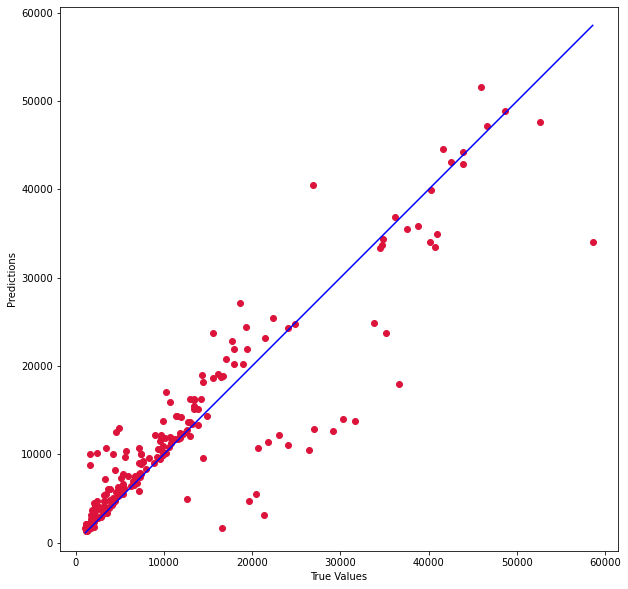

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred,c='crimson')
p1=max(max(Y_pred),max(Y_test))
p2=min(min(Y_pred),min(Y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()
